# Newton's Method for Calculating Square Roots
This method, even though its named after Sir Issac Newton, was in use by the Babylonians. Note the incredibly accuracy in comparison with the python standard math library.

Remark.
$$\log_{10}(2^{32}) \approx 9.63295986125$$
which is why we can only guarantee this level of precision in decimals. See that
$$\log_{10}(2^{b}) = b \log_{10}(2) = b \cdot 0.30102999566$$
which gives us an idea of how many decimal places or precision we can get for however many bits we store. So with 10 bits, we can only get over 3 digits of decimal precision.

In [1]:
def square_root(N: int, err: int) -> float:
    # "Newton's Method" to calculate square roots
    old_guess = N / 2
    new_guess = ((N / old_guess) + old_guess) / 2
    while(abs(old_guess - new_guess) > 10**(-err)):
        old_guess = new_guess
        new_guess = ((N / old_guess) + old_guess) / 2
    
    return new_guess

In [2]:
# Time keeping and comparison
import time
from math import sqrt
n = 720

math_start_time = time.time()
math_val = sqrt(n)
math_end_time = time.time()
math_elapsed = math_end_time - math_start_time

start_time = time.time()
func_val = square_root(n, 6)
end_time = time.time()
my_func_elapsed = end_time - start_time

print("Math Library:", math_val, "| Ran in --- %s seconds ---" % (math_elapsed))
print("My function:", func_val, "| Ran in --- %s seconds ---" % (my_func_elapsed))
print("Absolute Error:", abs(func_val - math_val))
print("Relative Error, in favor of math method:", abs(func_val - math_val) / math_val)
print("Time difference: %s - tenths-of-seconds" % (my_func_elapsed - math_elapsed))

Math Library: 26.832815729997478 | Ran in --- 1.5974044799804688e-05 seconds ---
My function: 26.832815729997478 | Ran in --- 1.7881393432617188e-05 seconds ---
Absolute Error: 0.0
Relative Error, in favor of math method: 0.0
Time difference: 1.9073486328125e-06 - tenths-of-seconds


# Bisection Method for Calculating Regular Roots
This is an implementation of the binary search algorithm to calculate general integer roots of other integers. This has $O(\log(n))$ time complexity.

In [3]:
def general_roots(base: int, exp: int, err: int) -> float:
    # Bisection Method
    low = 1
    mid = (base + 1) / 2 # Midpoint
    high = base
    mid_exp = mid**exp
    while(abs(mid_exp - base) > 10**(-err)):
        if (mid_exp > base):
            high = mid
            mid += low
            mid /= 2
            mid_exp = mid**exp
        elif (mid_exp < base):
            low = mid
            mid += high
            mid /= 2
            mid_exp = mid**exp
        else:
            return mid
        
    return mid

In [4]:
n = 10
exp = 10
error = 12

math_start_time = time.time()
math_val = n**(1/exp)
math_end_time = time.time()
math_elapsed = math_end_time - math_start_time


start_time = time.time()
func_val = general_roots(n, exp, error)
end_time = time.time()
my_func_elapsed = end_time - start_time


print("Math Library:", math_val, "| Ran in --- %s seconds ---" % (math_elapsed))
print("My function:", func_val, "| Ran in --- %s seconds ---" % (my_func_elapsed))
print("Absolute Error:", abs(func_val - math_val))
print("Relative Error, in favor of math method:", abs(func_val - math_val) / math_val)
print("Time difference: %s tenths-of-seconds" % (my_func_elapsed - math_elapsed))

Math Library: 1.2589254117941673 | Ran in --- 1.9073486328125e-05 seconds ---
My function: 1.2589254117941664 | Ran in --- 2.6941299438476562e-05 seconds ---
Absolute Error: 8.881784197001252e-16
Relative Error, in favor of math method: 7.055051962406025e-16
Time difference: 7.867813110351562e-06 tenths-of-seconds


# Bisection Method
Find $x$ when $f(x) = 0$:

Assume that $f$ is continuous in the closed interval $[a,b]$.

(1) Check that $f(a)$ and $f(b)$ have opposite signs.

(2) Calculate $c = \frac{a + b}{2}$, the midpoint of the two points.

(3) Calculate $f(c)$.

(4) If $f(c)$ is close enough to zero, stop iterating. Otherwise depending on how far it is, take a new interval $[a, f(c)]$ or $[f(c), b]$ and perform a binary search on this interval.

Try this on the following functions from $[0,5]$

$f(x) = \sin(x) + x^2$

$g(x) = 2 * \ln(x) + 5$

$h(x) = \sin(x) + x^2 - 2 * \ln(x) - 5$

/var/folders/ky/r_bpjsyd6h97cqjfvq97mgx40000gn/T/ipykernel_11933/3080996823.py:10: RuntimeWarning: invalid value encountered in log
  g = (2 * np.log(x)) + 5
/var/folders/ky/r_bpjsyd6h97cqjfvq97mgx40000gn/T/ipykernel_11933/3080996823.py:11: RuntimeWarning: invalid value encountered in log
  h = np.sin(x) + x**2 - (2 * np.log(x)) - 5


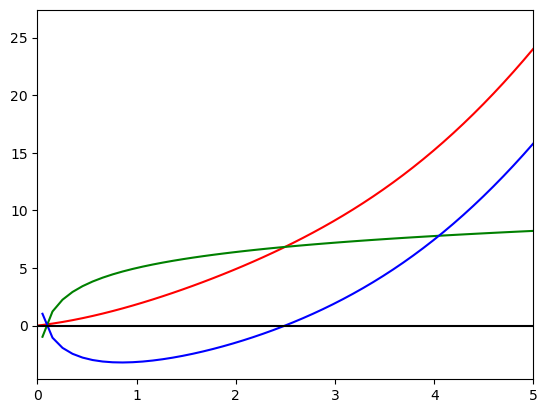

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


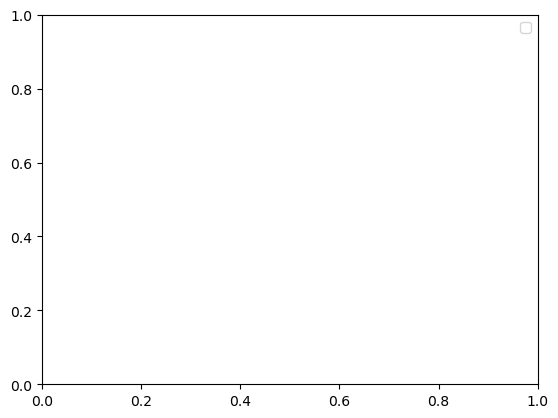

In [24]:
# Plotting
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
f = np.sin(x) + x**2
g = (2 * np.log(x)) + 5
h = np.sin(x) + x**2 - (2 * np.log(x)) - 5
z = 0 * x
plt.plot(x, f, color='red')
plt.plot(x, g, color='green')
plt.plot(x, h, color='blue')
plt.plot(x, z, color='black')
plt.xlim(0,5)

plt.show()
plt.legend()

# Bisection Method

In [21]:
def BisectionMethod(func, a, b, err) -> float:
    # Takes a real-valued function, an interval where it crosses the x-axis, and a desired error from 0 to output a value close to the zero of the function
    a_eval = func(a)
    b_eval = func(b)
#     print("a_eval:", a_eval, "b_eval:", b_eval) # Debug
    # Edge cases
    if a_eval == 0:
        return a
    elif b_eval == 0:
        return b
    elif a_eval * b_eval > 0:
        return None
    
    low = a
    high = b
    c = (a + b) / 2
    c_eval = func(c)
    low_eval = func(low)
    high_eval = func(high)
    while(abs(c_eval) > 10**(-err)):
        if (func(c) * low_eval < 0):
            high = c          
        elif (c_eval * high_eval < 0):
            low = c
        else:
            return c
        c = (low + high) / 2
        c_eval = func(c)
        low_eval = func(low)
        high_eval = func(high)
    
    return c

In [23]:
import numpy as np
def f_x(x) -> float:
    val = np.sin(x) + x*2
    return val

def g_x(x) -> float:
    val = (2 * np.log(x)) - 5
    return val

def h_x(x) -> float:
    val = np.sin(x) + x**2 - (2 * np.log(x)) - 5
    return val

def j_x(x) -> float:
    val = x**2 - 2
    return val

B1 = BisectionMethod(f_x, 0, 5, 6)
B2 = BisectionMethod(g_x, 1, 5, 6)
B3 = BisectionMethod(h_x, 1, 5, 6)
B4 = BisectionMethod(j_x, 1, 5, 6)
B5 = BisectionMethod(j_x, -5, 1, 6)

print(B1)
print(B2)
print(B3)
print(B4)
print(B5)

0
None
2.495319366455078
1.4142136573791504
-1.4142134189605713


# Regula Falsi Method
May cause significant or middling improvements in performance. This is a first order method that is faster on-average than bisection, but is still $\log$ convergence. Issue can come if $f(high) - f(low) = 0$, but they would have to be VERY close for this to happen (this would be a computer error, or we unexpectedly hit a double value). 

In [8]:
def RegulaFalseMethod(func, a, b, err) -> float:
    # Takes a real-valued function, an interval where it crosses the x-axis, and a desired error from 0 to output a value close to the zero of the function
    a_eval = func(a)
    b_eval = func(b)
#     print("a_eval:", a_eval, "b_eval:", b_eval) # Debug
    # Edge cases
    if a_eval == 0:
        return a
    elif b_eval == 0:
        return b
    elif a_eval * b_eval > 0:
        return None
    
    low = a
    high = b
    c = (low*func(high) - high*func(low))/(func(high) - func(low))
    c_eval = func(c)
    low_eval = func(low)
    high_eval = func(high)
    while(abs(c_eval) > 10**(-err)):
        if (func(c) * low_eval < 0):
            high = c          
        elif (c_eval * high_eval < 0):
            low = c
        else:
            return c
        
        low_eval = func(low)
        high_eval = func(high)
        if func(high) - func(low) == 0:
            return None
        c = (low*func(high) - high*func(low))/(func(high) - func(low))
        c_eval = func(c)
        
    
    return c

In [9]:
import numpy as np
def f_x(x) -> float:
    val = np.sin(x) + x*2
    return val

def g_x(x) -> float:
    val = (2 * np.log(x)) - 5
    return val

def h_x(x) -> float:
    val = np.sin(x) + x**2 - (2 * np.log(x)) - 5
    return val

print(RegulaFalseMethod(f_x, 0, 5, 6))
print(RegulaFalseMethod(g_x, 1, 5, 6))
print(RegulaFalseMethod(h_x, 1, 5, 6))

0
None
2.495318954353694


# Newton's Method

In [1]:
def NewtonsMethod(func, derv, x_0, step, err) -> float:
    # Uses Newton's Method of finding roots. Has quadratic convergence time (versus log convergence)
    fun_eval = func(x_0)
    der_eval = derv(x_0)
#     print("fun_eval:", fun_eval, "der_eval:", der_eval) # Debug
    # Edge cases
    if fun_eval == 0:
        return x_0
    elif der_eval == 0:
        return None
    
    x_n = x_0
    x_n1 = x_n - (fun_eval/der_eval)
    while(abs(fun_eval) > 10**(-err)):
        fun_eval = func(x_n1)
        der_eval = derv(x_n1)
#         print("f(x_n+1) =", fun_eval, "\t f'(x_n+1) =", der_eval) # updating x-vals - Debug
#         print("f(x_n+1) =", fun_eval, "\t f'(x_n+1) =", der_eval) # updating f and f' - Debug
        if der_eval == 0:
            return None
        
        x_n = x_n1
        x_n1 = x_n - (fun_eval/der_eval)
        
    return x_n1

In [11]:
def newt_f(x) -> float:
    val = x**3 - 2*x + 2
    return val

def newt_df(x) -> float:
    val = 3*(x**2) - 2
    return val

def newt_g(x) -> float:
    val = x**3 - 5*x
    return val

def newt_dg(x) -> float:
    val = 3*(x**2) - 5
    return val


print(NewtonsMethod(newt_f, newt_df, -2, 0.5, 6))
print(NewtonsMethod(newt_g, newt_dg, -0.5, 0.5, 6))

-1.7692923542386314
0.0


# Secant Method
We approximate the tangent line by using a secant line. This method is more robust than Newton's method as it does not require us to compute a derivative.

In [12]:
def SecantMethod(func, x_0, step, err) -> float:
    # Approximates derivative, quasi-Newton method, still quadratic convergence
    fnm1_eval = func(x_0)
    x_nm1 = x_0
    x_n = 0.0
    x_m1 = x_0 - step
    x_p1 = x_0 + step
    fm1_eval = func(x_m1)
    fp1_eval = func(x_p1)
#     print("fmn1_eval:", fnm1_eval, f'interval: [{x_m1}, {x_p1}]') # Debug
    # Edge cases
    if fnm1_eval == 0:
        return x_0
    if fnm1_eval * fm1_eval < 0:
        x_n = x_m1
    elif fnm1_eval * fp1_eval < 0:
        x_n = x_p1
    else:
        x_n = x_m1
    
    fn_eval = func(x_n)
    x_n1 = x_n - (fn_eval*(x_n - x_nm1)/(fn_eval - fnm1_eval))
    fn1_eval = func(x_n1)
    while(abs(fn1_eval) > 10**(-err)):
        # Updating Values
        x_nm1 = x_n
        x_n = x_n1
        fnm1_eval = fn_eval
        fn_eval = func(x_n)
        
        # Iterative step
        x_n1 = x_n - (fn_eval*(x_n - x_nm1)/(fn_eval - fnm1_eval))
        fn1_eval = func(x_n1)
        
#         print("f(x_n+1) =", fun_eval, "\t f'(x_n+1) =", der_eval) # updating x-vals - Debug
#         print("f(x_n+1) =", fun_eval, "\t f'(x_n+1) =", der_eval) # updating f and f' - Debug
        
    return x_n1

In [13]:
def sec_f(x) -> float:
    val = x**3 - 2*x + 2
    return val

def sec_g(x) -> float:
    val = 3*(x**2) - 2
    return val

def sec_h(x) -> float:
    val = x**3 - 5*x
    return val

def sec_z(x) -> float:
    val = 3*(x**2) - 5
    return val


print(SecantMethod(sec_f, -2, 0.5, 6))
print(SecantMethod(sec_g, -1, 0.5, 6))
print(SecantMethod(sec_h, -8, 0.5, 6))
print(SecantMethod(sec_z, -0.5, 0.5, 6))

-1.7692923548779316
-0.816496581119428
-2.236067988210009
-1.2909944457965612


### Running on an array

In [ ]:
# Time keeping and comparison
import time
from math import sqrt

a = [31000, 612373, 21391]
b = []
bt = []
c = []
ct = []
math_val = 0
func_val = 0

for num in a:
    math_start_time = time.time()
    math_val = sqrt(n)
    math_end_time = time.time()
    b.append(math_val)
    bt.append(math_end_time - math_start_time)

for num in a:
    start_time = time.time()
    func_val = square_root(n, 8)
    end_time = time.time()
    c.append(math_val)
    ct.append(end_time - start_time)


print("Math Library:\n", b, "\n\t Ran in --- %s seconds ---\n" % (bt))
print("My function:\n", c, "\n\t Ran in --- %s seconds ---\n" % (ct))
print("Absolute Error:\n", [abs(b[i] - c[i]) for i in range(0, len(a))])
print("Relative Error, in favor of math method:\n", [abs(b[i] - c[i]) / b[i] for i in range(0, len(a))])
print("\nTime difference: %s - tenths-of-seconds" % ([ct[i] - bt[i] for i in range(0, len(a))]))

Math Library:
 [26.832815729997478, 26.832815729997478, 26.832815729997478] 
	 Ran in --- [6.9141387939453125e-06, 1.1920928955078125e-06, 0.0] seconds ---

My function:
 [26.832815729997478, 26.832815729997478, 26.832815729997478] 
	 Ran in --- [2.09808349609375e-05, 5.7220458984375e-06, 5.7220458984375e-06] seconds ---

Absolute Error:
 [0.0, 0.0, 0.0]
Relative Error, in favor of math method:
 [0.0, 0.0, 0.0]

Time difference: [1.4066696166992188e-05, 4.5299530029296875e-06, 5.7220458984375e-06] - tenths-of-seconds
